In [1]:
import torch

from train_sae.saes.crosscoder import CrossCoderSAE

/home/cadegord/miniconda3/envs/train-sae/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weights = torch.load(
    "../wandb/run-20250411_232248-ot0db27c/files/model_49999_flops_3.22e+14.pt"
)

/tmp/ipykernel_1764871/1758793811.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load("../wandb/run-20250411_232248-ot0db27c/files/model_49999_flops_3.2

In [3]:
cc = CrossCoderSAE(2, 128, 2048, "vanilla", {})
cc.load_state_dict(weights)

<All keys matched successfully>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
dec1_weights = cc.autoencoders[0].decoder.weight.detach()
dec2_weights = cc.autoencoders[1].decoder.weight.detach()
print(dec1_weights.shape)

torch.Size([128, 2048])


Text(0.5, 1.0, 'Distribution of Decoder 1 Weight Norms')

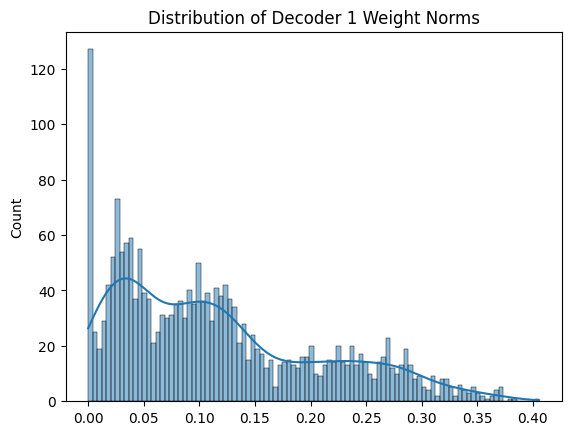

In [6]:
dec1_weight_norms = dec1_weights.norm(dim=0)
dec2_weight_norms = dec2_weights.norm(dim=0)

relative_norms = dec1_weight_norms / (dec1_weight_norms + dec2_weight_norms)

sns.histplot(relative_norms, bins=100, kde=True)
plt.title("Distribution of Decoder 1 Weight Norms")

In [7]:
topk_cc = CrossCoderSAE(2, 128, 2048, "topk", {"topk": 32})
topk_cc.load_state_dict(
    torch.load(
        "../wandb/run-20250412_002146-t6vnrt8s/files/model_50000_flops_3.22e+14.pt"
    )
)

topk_dec1_weights = topk_cc.autoencoders[0].decoder.weight.detach()
topk_dec2_weights = topk_cc.autoencoders[1].decoder.weight.detach()

/tmp/ipykernel_1764871/251759020.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  topk_cc.load_state_dict(torch.load("../wandb/run-20250412_002146-t6vnrt8s/files/model_50

<Axes: ylabel='Count'>

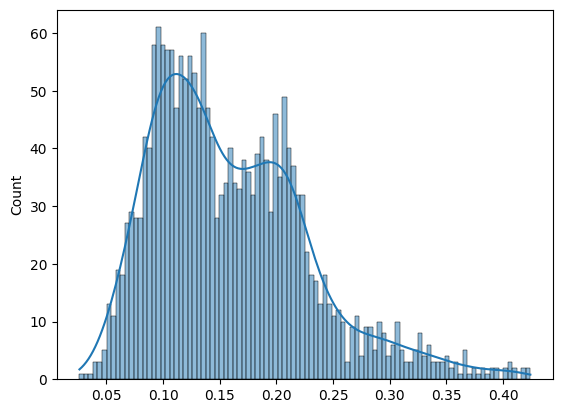

In [8]:
# make same plot from above for topk weights
topk_dec1_weight_norms = topk_dec1_weights.norm(dim=0)
topk_dec2_weight_norms = topk_dec2_weights.norm(dim=0)

topk_relative_norms = topk_dec1_weight_norms / (
    topk_dec1_weight_norms + topk_dec2_weight_norms
)

sns.histplot(topk_relative_norms, bins=100, kde=True)

In [9]:
better_transformer_cc = CrossCoderSAE(2, 128, 2048, "vanilla", {"sparsity": 0.05})
better_transformer_cc.load_state_dict(
    torch.load(
        "/home/cadegord/projects/train-SAE/wandb/run-20250413_031116-10jzio3k/files/model_50000_flops_3.22e+14.pt"
    )
)

better_transformer_dec1_weights = better_transformer_cc.autoencoders[
    0
].decoder.weight.detach()
better_transformer_dec2_weights = better_transformer_cc.autoencoders[
    1
].decoder.weight.detach()

/tmp/ipykernel_1764871/1118320150.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  better_transformer_cc.load_state_dict(torch.load("/home/cadegord/projects/train-SAE/wan

<Axes: ylabel='Count'>

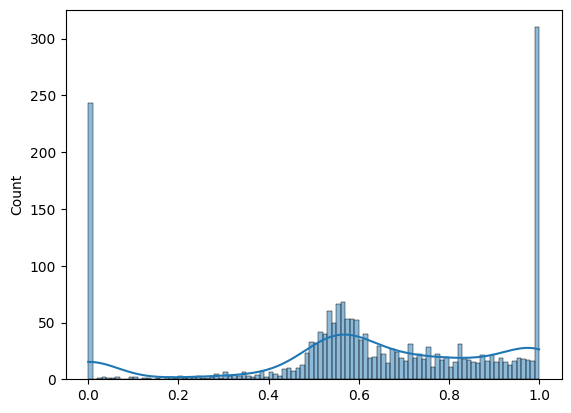

In [10]:
# make same plot from above for better transformer weights
better_transformer_dec1_weight_norms = better_transformer_dec1_weights.norm(dim=0)
better_transformer_dec2_weight_norms = better_transformer_dec2_weights.norm(dim=0)

better_transformer_relative_norms = better_transformer_dec1_weight_norms / (
    better_transformer_dec1_weight_norms + better_transformer_dec2_weight_norms
)

sns.histplot(better_transformer_relative_norms, bins=100, kde=True)

In [11]:
sparsity_01_cc = CrossCoderSAE(2, 128, 2048, "vanilla", {"sparsity": 0.01})
sparsity_01_cc.load_state_dict(
    torch.load(
        "/home/cadegord/projects/train-SAE/wandb/run-20250413_033726-qidkggmm/files/model_50000_flops_3.22e+14.pt"
    )
)

sparsity_01_dec1_weights = sparsity_01_cc.autoencoders[0].decoder.weight.detach()
sparsity_01_dec2_weights = sparsity_01_cc.autoencoders[1].decoder.weight.detach()

/tmp/ipykernel_1764871/2602604856.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sparsity_01_cc.load_state_dict(torch.load("/home/cadegord/projects/train-SAE/wandb/run-

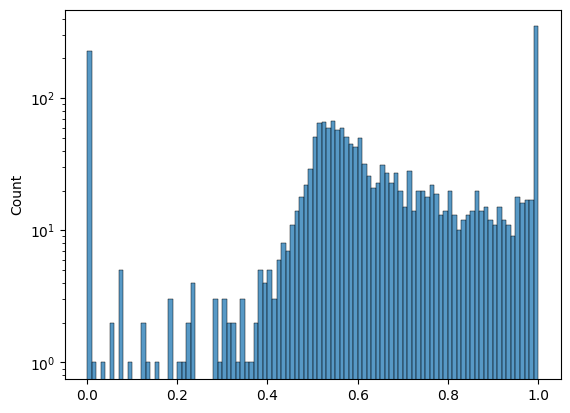

In [12]:
# make same plot from above for sparsity 0.01 weights
sparsity_01_dec1_weight_norms = sparsity_01_dec1_weights.norm(dim=0)
sparsity_01_dec2_weight_norms = sparsity_01_dec2_weights.norm(dim=0)

sparsity_01_relative_norms = sparsity_01_dec1_weight_norms / (
    sparsity_01_dec1_weight_norms + sparsity_01_dec2_weight_norms
)

sns.histplot(sparsity_01_relative_norms, bins=100)
plt.yscale("log")

In [13]:
addition_cc = CrossCoderSAE(2, 128, 2048, "vanilla", {"sparsity": 0.01}).to("cuda:7")
addition_cc.load_state_dict(
    torch.load(
        "/home/cadegord/projects/train-SAE/wandb/run-20250414_221947-ned7cbx5/files/model_25000_flops_1.61e+14.pt",
        map_location="cuda:7",
    )
)

# make same plot from above for addition cc weights
addition_dec1_weights = addition_cc.autoencoders[0].decoder.weight.detach()
addition_dec2_weights = addition_cc.autoencoders[1].decoder.weight.detach()

/tmp/ipykernel_1764871/1045120154.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  addition_cc.load_state_dict(torch.load("/home/cadegord/projects/train-SAE/wandb/run-202

<Axes: ylabel='Count'>

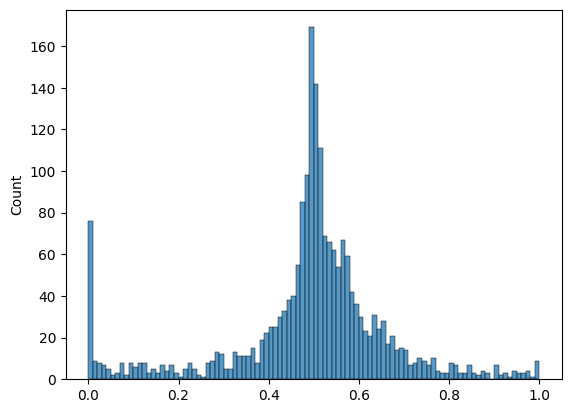

In [14]:
# make same plot from above for addition cc weights
addition_dec1_weight_norms = addition_dec1_weights.norm(dim=0)
addition_dec2_weight_norms = addition_dec2_weights.norm(dim=0)

addition_relative_norms = addition_dec1_weight_norms / (
    addition_dec1_weight_norms + addition_dec2_weight_norms
)

sns.histplot(addition_relative_norms.numpy(force=True), bins=100)

# Begin Analysis

In [15]:
from train_sae.models.transformer import trunk_and_head_from_pretrained

In [16]:
device = "cuda:7"
pre_feat, pre_decoder = trunk_and_head_from_pretrained(
    "/home/cadegord/projects/transformerzoo/private/grokking/addition-freq-causal-ln/1100-train=1.00-test=0.53.pt",
    1,
    device,
    torch.float32,
    99,
    128,
    512,
    4,
    2,
    use_geglu=False,
    max_seq_len=2048,
    use_learned_pos_emb=True,
    norm_layer="LayerNorm",
)
post_feat, post_decoder = trunk_and_head_from_pretrained(
    "/home/cadegord/projects/transformerzoo/private/grokking/addition-freq-causal-ln/1700-train=1.00-test=1.00.pt",
    1,
    device,
    torch.float32,
    99,
    128,
    512,
    4,
    2,
    use_geglu=False,
    max_seq_len=2048,
    use_learned_pos_emb=True,
    norm_layer="LayerNorm",
)

/home/cadegord/projects/train-SAE/train_sae/models/transformer.py:284: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(


In [17]:
# print device of the above 3 models
print(pre_feat.embeddings.weight.device)
print(post_feat.embeddings.weight.device)
print(addition_cc.autoencoders[0].decoder.weight.device)

cuda:7
cuda:7
cuda:7


In [18]:
# create train and test addition data
from itertools import product

from torch.utils.data import DataLoader

prime = 97

data = []
for a, b in product(range(prime), range(prime)):
    data.append([a, 97, b, 98, (a + b) % prime])

data = torch.tensor(data)

generator = torch.Generator().manual_seed(42)
train_data, test_data = torch.utils.data.random_split(
    data, [0.5, 0.5], generator=generator
)

train_dataloader = DataLoader(
    train_data,
    batch_size=512,
    shuffle=True,
    pin_memory=True,
)
test_dataloader = DataLoader(
    test_data,
    batch_size=512,
    shuffle=False,
    pin_memory=True,
)

In [19]:
# get train and test accuracy without a cross coder
train_correct = 0
train_total = 0
for batch in train_dataloader:
    batch = batch.long()
    batch = batch.to(device)
    x, y = batch[:, :4], batch[:, 4]
    with torch.no_grad():
        preds = pre_decoder(pre_feat(x))[:, -1, :]
        # preds = pre_transformer(x)[:, -1, :]
        train_correct += (preds.argmax(dim=1) == y).sum().item()
        train_total += y.size(0)
print(f"Train accuracy: {train_correct / train_total}")

test_correct = 0
test_total = 0
for batch in test_dataloader:
    x, y = batch[:, :-1].to(device), batch[:, -1].to(device)
    with torch.no_grad():
        preds = pre_decoder(pre_feat(x))[:, -1, :]
        # preds = pre_transformer(x)[:, -1, :]
        test_correct += (preds.argmax(dim=1) == y).sum().item()
        test_total += y.size(0)
print(f"Test accuracy: {test_correct / test_total}")

Train accuracy: 1.0
Test accuracy: 0.5316751700680272


In [20]:
# get train and test accuracy with a cross coder
pre_train_correct = 0
pre_train_total = 0
post_train_correct = 0
post_train_total = 0
for batch in train_dataloader:
    batch = batch.long()
    batch = batch.to(device)
    x, y = batch[:, :4], batch[:, 4]
    with torch.no_grad():
        zs = [pre_feat(x), post_feat(x)]
        z_normalizing_factors = [
            pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
        ]
        zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
        encoded = addition_cc.encode(zs)
        z_hats = [
            autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
        ]
        z_hats = [z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)]
        pre_preds = pre_decoder(z_hats[0])[:, -1, :]
        post_preds = post_decoder(z_hats[1])[:, -1, :]
        pre_train_correct += (pre_preds.argmax(dim=1) == y).sum().item()
        pre_train_total += y.size(0)
        post_train_correct += (post_preds.argmax(dim=1) == y).sum().item()
        post_train_total += y.size(0)
print(f"Pre train accuracy: {pre_train_correct / pre_train_total}")
print(f"Post train accuracy: {post_train_correct / post_train_total}")

pre_test_correct = 0
pre_test_total = 0
post_test_correct = 0
post_test_total = 0
for batch in test_dataloader:
    batch = batch.long()
    batch = batch.to(device)
    x, y = batch[:, :4], batch[:, 4]
    with torch.no_grad():
        zs = [pre_feat(x), post_feat(x)]
        z_normalizing_factors = [
            pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
        ]
        zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
        encoded = addition_cc.encode(zs)
        z_hats = [
            autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
        ]
        z_hats = [z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)]
        pre_preds = pre_decoder(z_hats[0])[:, -1, :]
        post_preds = post_decoder(z_hats[1])[:, -1, :]
        pre_test_correct += (pre_preds.argmax(dim=1) == y).sum().item()
        pre_test_total += y.size(0)
        post_test_correct += (post_preds.argmax(dim=1) == y).sum().item()
        post_test_total += y.size(0)
print(f"Pre test accuracy: {pre_test_correct / pre_test_total}")
print(f"Post test accuracy: {post_test_correct / post_test_total}")

Pre train accuracy: 1.0
Post train accuracy: 1.0
Pre test accuracy: 0.5318877551020408
Post test accuracy: 0.9963860544217688


In [48]:
def get_train_test_accuracy(feat_idxs: list[int], multiplier: float = 0.0):
    # get train and test accuracy with a cross coder
    pre_train_correct = 0
    pre_train_total = 0
    post_train_correct = 0
    post_train_total = 0
    for batch in train_dataloader:
        batch = batch.long()
        batch = batch.to(device)
        x, y = batch[:, :4], batch[:, 4]
        with torch.no_grad():
            zs = [pre_feat(x), post_feat(x)]
            z_normalizing_factors = [
                pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
            ]
            zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
            encoded = addition_cc.encode(zs)
            encoded[:, :, feat_idxs] = encoded[:, :, feat_idxs] * multiplier
            z_hats = [
                autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
            ]
            z_hats = [
                z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)
            ]
            pre_preds = pre_decoder(z_hats[0])[:, -1, :]
            post_preds = post_decoder(z_hats[1])[:, -1, :]
            pre_train_correct += (pre_preds.argmax(dim=1) == y).sum().item()
            pre_train_total += y.size(0)
            post_train_correct += (post_preds.argmax(dim=1) == y).sum().item()
            post_train_total += y.size(0)

    pre_test_correct = 0
    pre_test_total = 0
    post_test_correct = 0
    post_test_total = 0
    for batch in test_dataloader:
        batch = batch.long()
        batch = batch.to(device)
        x, y = batch[:, :4], batch[:, 4]
        with torch.no_grad():
            zs = [pre_feat(x), post_feat(x)]
            z_normalizing_factors = [
                pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
            ]
            zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
            encoded = addition_cc.encode(zs)
            encoded[:, :, feat_idxs] = encoded[:, :, feat_idxs] * multiplier
            z_hats = [
                autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
            ]
            z_hats = [
                z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)
            ]
            pre_preds = pre_decoder(z_hats[0])[:, -1, :]
            post_preds = post_decoder(z_hats[1])[:, -1, :]
            pre_test_correct += (pre_preds.argmax(dim=1) == y).sum().item()
            pre_test_total += y.size(0)
            post_test_correct += (post_preds.argmax(dim=1) == y).sum().item()
            post_test_total += y.size(0)

    return (
        pre_train_correct / pre_train_total,
        post_train_correct / post_train_total,
        pre_test_correct / pre_test_total,
        post_test_correct / post_test_total,
    )

In [35]:
pre_tr_acc, post_tr_acc, pre_te_acc, post_te_acc = get_train_test_accuracy([])

In [27]:
# get the sorted indices of relative norms of the addition cc weights
sorted_indices = torch.argsort(addition_relative_norms)

results = []
for idx in sorted_indices:
    results.append(get_train_test_accuracy([idx]))

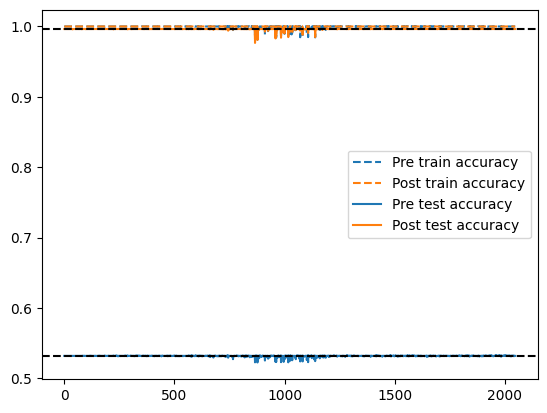

In [36]:
# make a plot of the results as follows:
# the pre model accuracies in blue
# the post model accuracies in orange
# the train accuracies dashed
# the test accuracies solid
results_np = np.array(results)
plt.plot(results_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

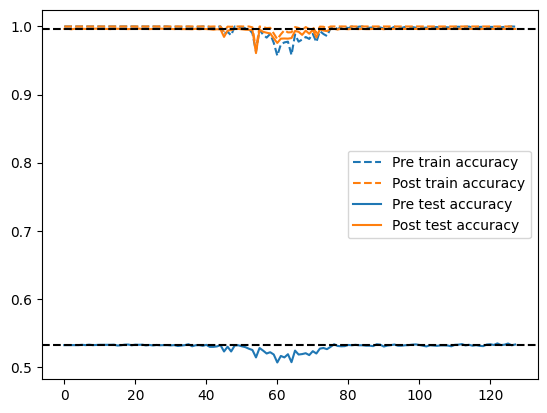

In [37]:
# repeat the above but use chunks of 16 features
results_16 = []
for i in range(0, len(sorted_indices), 16):
    results_16.append(get_train_test_accuracy(sorted_indices[i : i + 16]))
results_16_np = np.array(results_16)
plt.plot(results_16_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_16_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_16_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_16_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

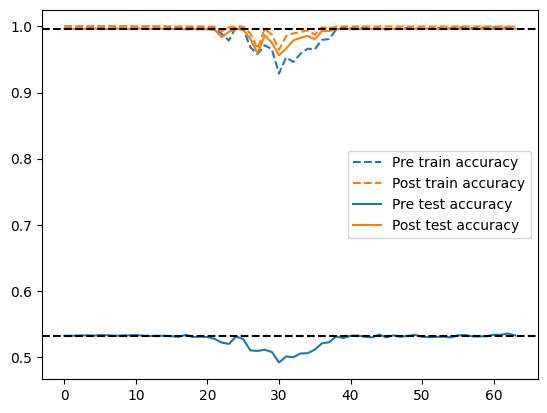

In [38]:
# repeat the above but use chunks of 32 features
results_32 = []
for i in range(0, len(sorted_indices), 32):
    results_32.append(get_train_test_accuracy(sorted_indices[i : i + 32]))
results_32_np = np.array(results_32)
plt.plot(results_32_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_32_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_32_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_32_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

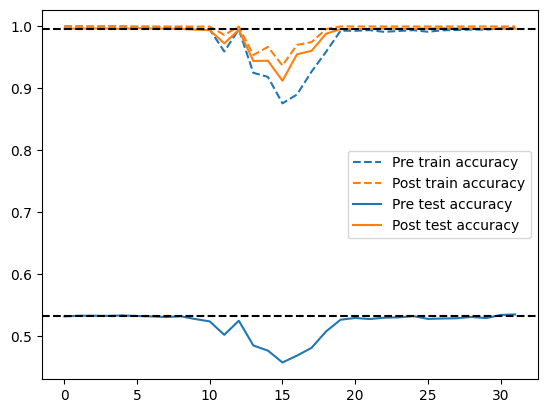

In [39]:
# repeat the above but use chunks of 64 features
results_64 = []
for i in range(0, len(sorted_indices), 64):
    results_64.append(get_train_test_accuracy(sorted_indices[i : i + 64]))
results_64_np = np.array(results_64)
plt.plot(results_64_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_64_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_64_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_64_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

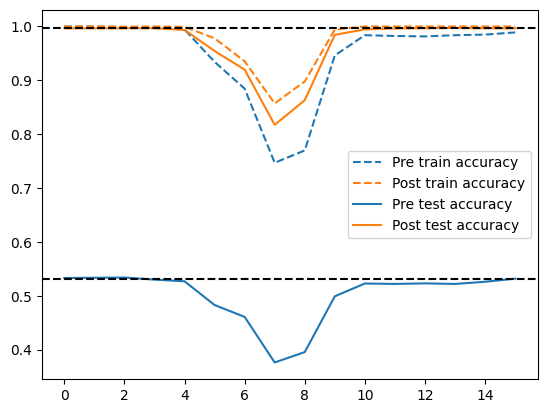

In [40]:
# repeat the above but use chunks of 128 features
results_128 = []
for i in range(0, len(sorted_indices), 128):
    results_128.append(get_train_test_accuracy(sorted_indices[i : i + 128]))
results_128_np = np.array(results_128)
plt.plot(results_128_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_128_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_128_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_128_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

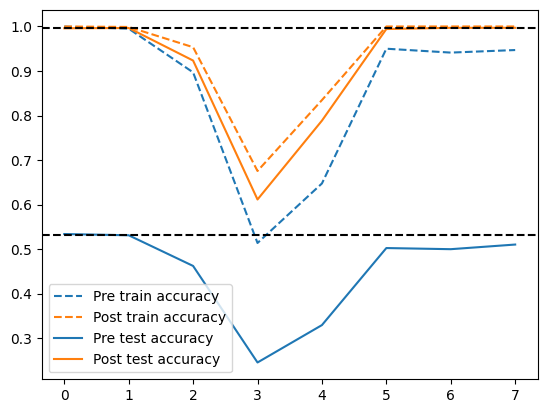

In [41]:
# repeat the above but use chunks of 256 features
results_256 = []
for i in range(0, len(sorted_indices), 256):
    results_256.append(get_train_test_accuracy(sorted_indices[i : i + 256]))
results_256_np = np.array(results_256)
plt.plot(results_256_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_256_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_256_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_256_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

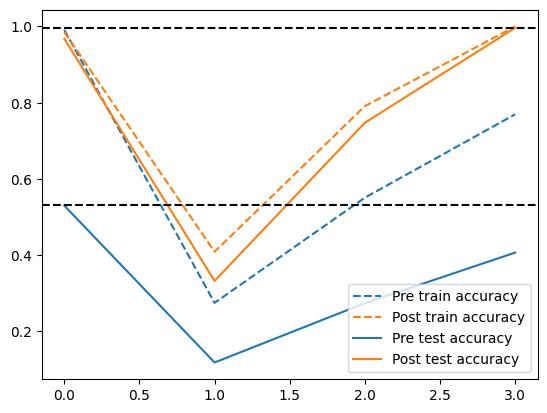

In [42]:
# repeat the above but use chunks of 512 features
results_512 = []
for i in range(0, len(sorted_indices), 512):
    results_512.append(get_train_test_accuracy(sorted_indices[i : i + 512]))
results_512_np = np.array(results_512)
plt.plot(results_512_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_512_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_512_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_512_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

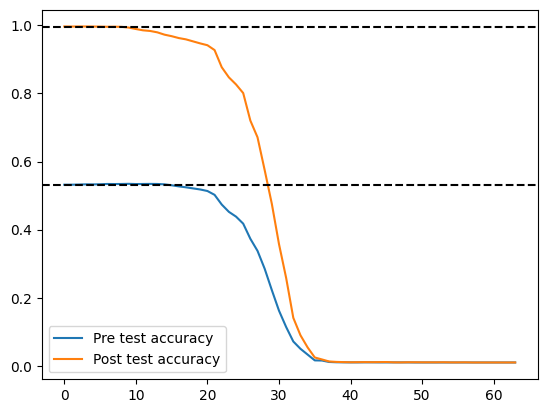

In [43]:
# in chunks of 32 make a cdf of post and pre test accuracy
cdf_results_32 = []
for i in range(0, len(sorted_indices), 32):
    cdf_results_32.append(get_train_test_accuracy(sorted_indices[: i + 32]))
cdf_results_32_np = np.array(cdf_results_32)
plt.plot(cdf_results_32_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(cdf_results_32_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

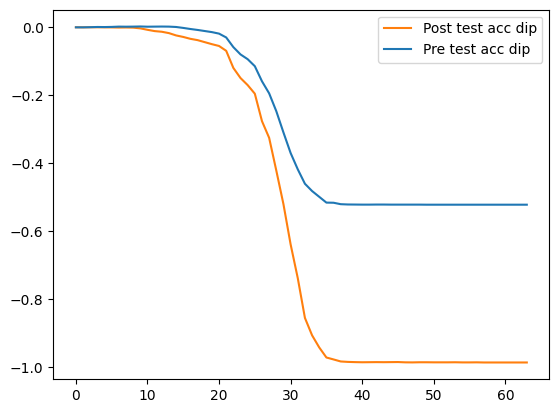

In [46]:
plt.plot(cdf_results_32_np[:, 3] - post_te_acc, label="Post test acc dip", color="C1")
plt.plot(cdf_results_32_np[:, 2] - pre_te_acc, label="Pre test acc dip", color="C0")
plt.legend()

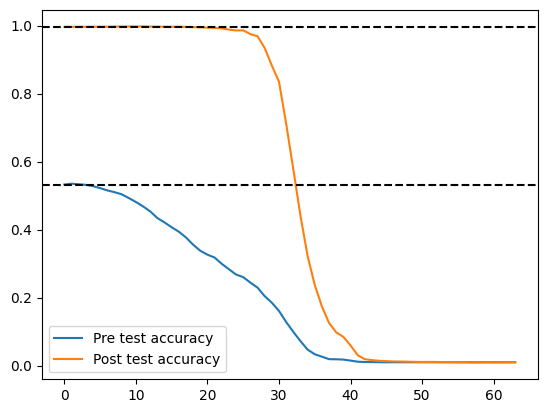

In [47]:
# in chunks of 32 make a cdf of post and pre test accuracy
cdf_results_32_bwd = []
for i in range(0, len(sorted_indices), 32):
    cdf_results_32_bwd.append(get_train_test_accuracy(sorted_indices[-i - 32 :]))
cdf_results_32_bwd_np = np.array(cdf_results_32_bwd)
plt.plot(cdf_results_32_bwd_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(cdf_results_32_bwd_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

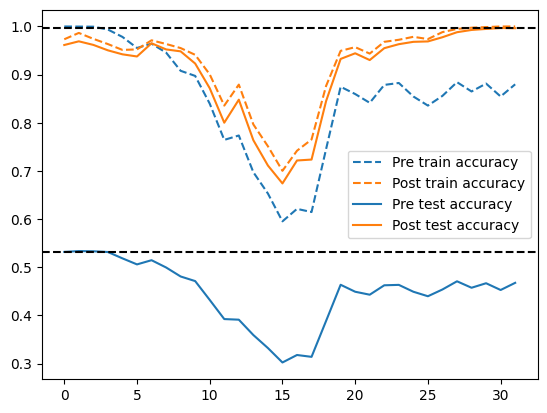

In [60]:
# repeat the above but use chunks of 64 features a
results_64 = []
for i in range(0, len(sorted_indices), 64):
    results_64.append(get_train_test_accuracy(sorted_indices[i : i + 64], -2))
results_64_np = np.array(results_64)
plt.plot(results_64_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_64_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_64_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_64_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

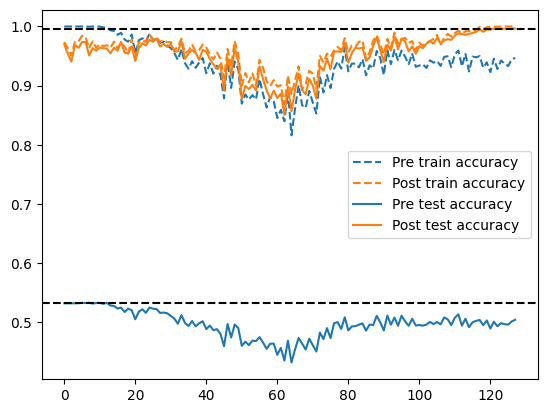

In [62]:
# repeat the above but use chunks of 16 features a
results_16 = []
for i in range(0, len(sorted_indices), 16):
    results_16.append(get_train_test_accuracy(sorted_indices[i : i + 16], -4))
results_16_np = np.array(results_16)
plt.plot(results_16_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_16_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_16_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_16_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()

In [64]:
# get max activations for each sparse feature
max_activations = torch.zeros(2048).to(device)
for batch in train_dataloader:
    batch = batch.long()
    batch = batch.to(device)
    x, y = batch[:, :4], batch[:, 4]
    with torch.no_grad():
        zs = [pre_feat(x), post_feat(x)]
        z_normalizing_factors = [
            pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
        ]
        zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
        encoded = addition_cc.encode(zs)  # shape (batch_size, 4, 2048)
        encoded_max = torch.max(encoded, dim=0).values  # shape (4, 2048)
        encoded_max = torch.max(encoded_max, dim=0).values  # shape (2048)
        max_activations = torch.maximum(max_activations, encoded_max)

In [67]:
def get_train_test_accuracy_clamped(feat_idxs: list[int], magnitude: float = 0.0):
    # get train and test accuracy with a cross coder
    pre_train_correct = 0
    pre_train_total = 0
    post_train_correct = 0
    post_train_total = 0
    for batch in train_dataloader:
        batch = batch.long()
        batch = batch.to(device)
        x, y = batch[:, :4], batch[:, 4]
        with torch.no_grad():
            zs = [pre_feat(x), post_feat(x)]
            z_normalizing_factors = [
                pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
            ]
            zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
            encoded = addition_cc.encode(zs)
            encoded[:, :, feat_idxs] = max_activations[feat_idxs] * magnitude
            z_hats = [
                autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
            ]
            z_hats = [
                z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)
            ]
            pre_preds = pre_decoder(z_hats[0])[:, -1, :]
            post_preds = post_decoder(z_hats[1])[:, -1, :]
            pre_train_correct += (pre_preds.argmax(dim=1) == y).sum().item()
            pre_train_total += y.size(0)
            post_train_correct += (post_preds.argmax(dim=1) == y).sum().item()
            post_train_total += y.size(0)

    pre_test_correct = 0
    pre_test_total = 0
    post_test_correct = 0
    post_test_total = 0
    for batch in test_dataloader:
        batch = batch.long()
        batch = batch.to(device)
        x, y = batch[:, :4], batch[:, 4]
        with torch.no_grad():
            zs = [pre_feat(x), post_feat(x)]
            z_normalizing_factors = [
                pre_feat.embed_dim**0.5 / z.norm(dim=-1, keepdim=True) for z in zs
            ]
            zs = [z * z_normalizing_factors[i] for i, z in enumerate(zs)]
            encoded = addition_cc.encode(zs)
            encoded[:, :, feat_idxs] = max_activations[feat_idxs] * magnitude
            z_hats = [
                autoencoder.decoder(encoded) for autoencoder in addition_cc.autoencoders
            ]
            z_hats = [
                z_hat / z_normalizing_factors[i] for i, z_hat in enumerate(z_hats)
            ]
            pre_preds = pre_decoder(z_hats[0])[:, -1, :]
            post_preds = post_decoder(z_hats[1])[:, -1, :]
            pre_test_correct += (pre_preds.argmax(dim=1) == y).sum().item()
            pre_test_total += y.size(0)
            post_test_correct += (post_preds.argmax(dim=1) == y).sum().item()
            post_test_total += y.size(0)

    return (
        pre_train_correct / pre_train_total,
        post_train_correct / post_train_total,
        pre_test_correct / pre_test_total,
        post_test_correct / post_test_total,
    )

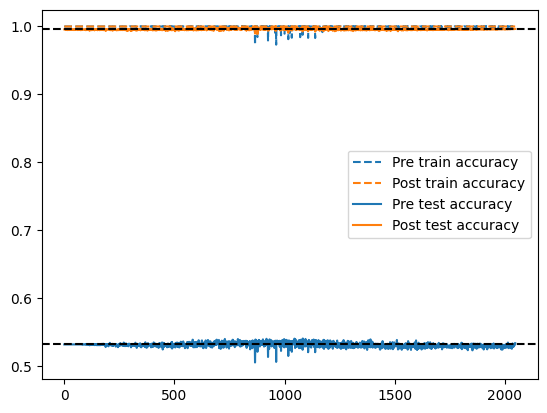

In [74]:
# use clamping on the sparse features
results_1 = []
for i in range(0, len(sorted_indices), 1):
    results_1.append(get_train_test_accuracy_clamped(sorted_indices[i : i + 1], 0.2))
results_1_np = np.array(results_1)
plt.plot(results_1_np[:, 0], label="Pre train accuracy", linestyle="--", color="C0")
plt.plot(results_1_np[:, 1], label="Post train accuracy", linestyle="--", color="C1")
plt.plot(results_1_np[:, 2], label="Pre test accuracy", color="C0")
plt.plot(results_1_np[:, 3], label="Post test accuracy", color="C1")
plt.axhline(pre_te_acc, color="black", linestyle="--")
plt.axhline(post_te_acc, color="black", linestyle="--")
plt.legend()